In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [363]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/INDUSINDBK.csv")

In [364]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075827e+11,NaN,NaN,NaN
1,2000-01-04,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320731e+11,NaN,NaN,NaN
2,2000-01-05,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675717e+11,NaN,NaN,NaN
3,2000-01-06,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510007e+11,NaN,NaN,NaN
4,2000-01-07,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [365]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 584.3

In [366]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,4.985000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,494.137563,494.856660,501.926409,486.991344,494.341986,494.322698,494.563232,2.351251e+06,1.531780e+14,7.324800e+04,7.596722e+05,0.489002
std,562.724997,563.200546,569.267316,556.232197,562.779367,562.718180,562.740212,5.664769e+06,3.679600e+14,1.090752e+05,1.099894e+06,0.189042
min,9.150000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,2.000000e+02,2.650000e+08,4.040000e+02,4.450000e+03,0.029900
25%,48.400000,48.800000,49.800000,47.300000,48.450000,48.450000,48.670000,4.119510e+05,3.268398e+12,1.744125e+04,1.977390e+05,0.350900
50%,255.100000,255.000000,261.400000,250.700000,255.100000,255.250000,255.430000,8.692310e+05,1.972708e+13,3.749000e+04,4.267010e+05,0.480000
75%,873.950000,875.000000,886.000000,858.500000,874.000000,874.550000,872.830000,1.772702e+06,1.118311e+14,8.079375e+04,8.737870e+05,0.620500
max,2023.050000,2033.100000,2038.000000,2003.450000,2022.000000,2023.050000,2022.360000,8.133645e+07,4.942748e+15,1.424793e+06,1.782411e+07,1.000000


In [367]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [368]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [369]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [370]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [371]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [372]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [373]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4980,2.290211,0.297550,859.55,4894557,NaN
4981,3.143190,2.664185,882.45,5202133,NaN
4982,4.842342,4.146067,926.90,9935828,NaN
4983,4.552393,0.277526,939.45,12187280,NaN
4984,3.649874,0.748922,934.95,7301455,NaN


In [374]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [375]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [376]:
#Define the prediction model
model = RandomForestRegressor()

In [377]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [378]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9821861610721416


In [379]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [380]:
predictions = model.predict(X_Check)

In [381]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

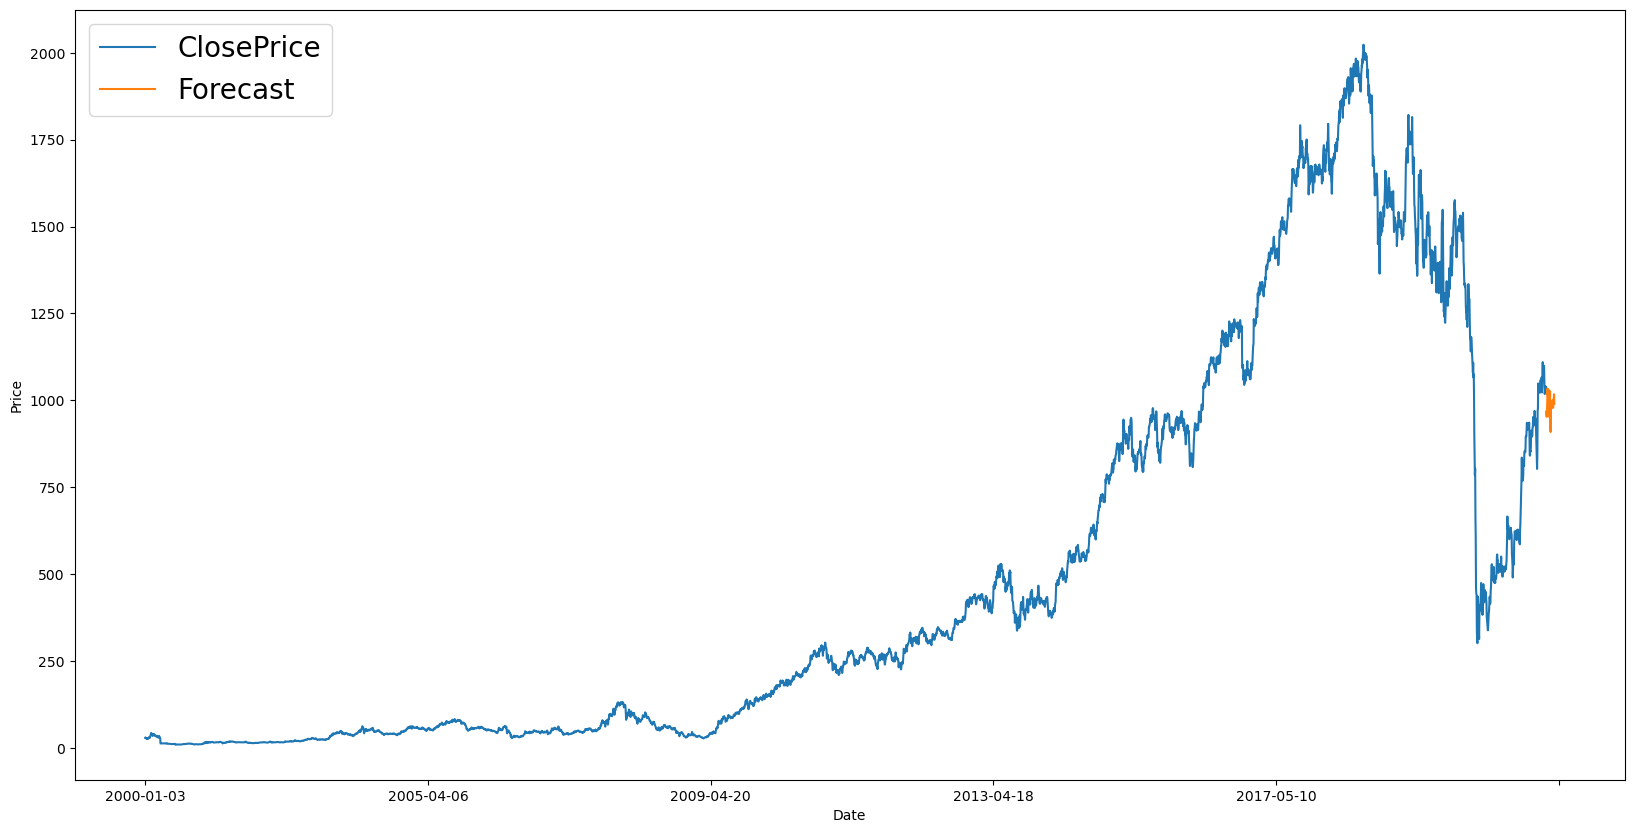

In [382]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')